# Analysis on the Natural Disasters' Impact on Endangered Species in Biodiverse Ecosystems

# Overview

# Importing Library

In [21]:
#%%bash
#pip install numpy pandas matplotlib seaborn

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Initialise Dataframe

In [22]:
df_amphibia = pd.read_excel('./Dataset/overall_AMPHIBIA.xlsx', header=1)
df_aves = pd.read_excel('./Dataset/overall_AVES.xlsx', header=1)
df_mammalia = pd.read_excel('./Dataset/overall_MAMMALIA.xlsx', header=1)
df_reptilia = pd.read_excel('./Dataset/overall_REPTILIA.xlsx', header=1)
df_disaster = pd.read_csv('./Dataset/disaster.csv')

# Ampibhia Dataset

In [23]:
print(f'There are total {len(df_amphibia)} rows and {len(df_amphibia.columns)} columns in datase overall_AMPHIBIA.xlsx ','\n')

conservation_status = df_amphibia['redlistCategory'].unique()
conservation_status_n = df_amphibia['redlistCategory'].nunique()

print(f"There are {conservation_status_n} status which consist of f{conservation_status}\n")

df_amphibia.info()

df_amphibia

There are total 1183 rows and 41 columns in datase overall_AMPHIBIA.xlsx  

There are 6 status which consist of f['Endangered' 'Vulnerable' 'Critically Endangered' 'Data Deficient'
 'Near Threatened' 'Least Concern']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1183 entries, 0 to 1182
Data columns (total 41 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   className                                 1183 non-null   object 
 1   orderName                                 1183 non-null   object 
 2   familyName                                1183 non-null   object 
 3   binomial                                  1183 non-null   object 
 4   range_size_ear                            598 non-null    float64
 5   total_perc_afected_ear                    598 non-null    float64
 6   total_perc_afected_pixel_ear              598 non-null    float64
 7   range_n_cells_ear              

,className,orderName,familyName,binomial,range_size_ear,total_perc_afected_ear,total_perc_afected_pixel_ear,range_n_cells_ear,avg_impact_sum_final_ear,earthquakes_freq,...,range_n_cells_hur,avg_impact_sum_final_hur,hurricanes_freq,classification_absolute_intersection.2,classification_binary_pixel_based.2,realm,distribuition,conservation_actions,redlistCategory,greenStatus
0,AMPHIBIA,ANURA,HYPEROLIIDAE,Afrixalus knysnae,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Afrotropical,mainland,<strong><em>Conservation Actions</em></strong>...,Endangered,NaN
1,AMPHIBIA,ANURA,PHYLLOMEDUSIDAE,Agalychnis annae,966.137070,96.278322,62.5,8.0,0.498351,6.0,...,NaN,NaN,NaN,NaN,NaN,Neotropical,mainland,<strong><em>Conservation Actions In-Place</em>...,Vulnerable,NaN
2,AMPHIBIA,ANURA,MANTELLIDAE,Aglyptodactylus australis,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Afrotropical,island,<strong><em>Conservation Actions</em></strong>...,Endangered,NaN
3,AMPHIBIA,ANURA,MANTELLIDAE,Aglyptodactylus laticeps,NaN,NaN,NaN,NaN,NaN,NaN,...,9.0,0.417476,2.0,risk,risk,Afrotropical,island,<strong><em>Conservation Actions</em></strong>...,Vulnerable,NaN
4,AMPHIBIA,ANURA,CERATOBATRACHIDAE,Alcalus mariae,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Indomalayan,island,<p><strong><em>Conservation Actions<br/></em><...,Endangered,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1178,AMPHIBIA,ANURA,RHACOPHORIDAE,Zhangixalus owstoni,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,0.935742,53.0,high-risk,high-risk,Indomalayan,island,<strong><em>Conservation Actions In-Place<br/>...,Near Threatened,NaN
1179,AMPHIBIA,ANURA,RHACOPHORIDAE,Zhangixalus pinglongensis,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.218241,2.0,risk,risk,Indomalayan,mainland,<em><strong>Conservation Actions In-Place</str...,Data Deficient,NaN
1180,AMPHIBIA,ANURA,RHACOPHORIDAE,Zhangixalus prasinatus,875.019532,2.592869,50.0,2.0,0.401926,1.0,...,2.0,0.878913,30.0,high-risk,high-risk,Indomalayan,island,<strong><em>Conservation Actions In-Place</em>...,Near Threatened,NaN
1181,AMPHIBIA,ANURA,RHACOPHORIDAE,Zhangixalus viridis,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,0.918575,60.0,high-risk,high-risk,Indomalayan,island,Its range includes a few protected areas.,Least Concern,NaN


Under redlistCategory column, there is one status called Data Deficient and since we will not need this in our analysis, we will drop it. We will also drop tsunami for the natural disasters and only use three natural disasters which comprise earthquake, volcanoes, and hurricanes.

In [24]:
df_amphibia = df_amphibia[df_amphibia['redlistCategory'] != 'Data Deficient'] # to drop Data Deficient

columns_to_drop = [
    'range_size_tsu',
    'total_perc_afected_tsu',
    'total_perc_afected_pixel_tsu',
    'range_n_cells_tsu',
    'avg_impact_sum_final_tsu',
    'tsunamis_freq',
    'classification_absolute_intersection_tsu',
    'classification_binary_pixel_based_tsu'
]


try:
    df_amphibia.drop(columns=columns_to_drop, inplace=True) # to drop tsunamis
    print("Columns dropped")
except:
    print("Columns already dropped before")


Columns dropped


C:\Users\jovian sanjaya putra\AppData\Local\Temp\ipykernel_9808\1526312887.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_amphibia.drop(columns=columns_to_drop, inplace=True) # to drop tsunamis


# Aves Dataset

In [25]:
print(f'There are total {len(df_aves)} rows and {len(df_aves.columns)} columns in datase overall_AVES.xlsx ','\n')

conservation_status = df_aves['redlistCategory'].unique()
conservation_status_n = df_aves['redlistCategory'].nunique()

print(f"There are {conservation_status_n} status which consist of f{conservation_status}\n")

df_aves.info()

df_aves

There are total 632 rows and 41 columns in datase overall_AVES.xlsx  

There are 6 status which consist of f['Endangered' 'Vulnerable' 'Least Concern' 'Critically Endangered'
 'Near Threatened' 'Data Deficient']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 632 entries, 0 to 631
Data columns (total 41 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   className                                 632 non-null    object 
 1   orderName                                 632 non-null    object 
 2   familyName                                632 non-null    object 
 3   binomial                                  632 non-null    object 
 4   range_size_ear                            246 non-null    float64
 5   total_perc_afected_ear                    246 non-null    float64
 6   total_perc_afected_pixel_ear              246 non-null    float64
 7   range_n_cells_ear                     

,className,orderName,familyName,binomial,range_size_ear,total_perc_afected_ear,total_perc_afected_pixel_ear,range_n_cells_ear,avg_impact_sum_final_ear,earthquakes_freq,...,range_n_cells_hur,avg_impact_sum_final_hur,hurricanes_freq,classification_absolute_intersection.2,classification_binary_pixel_based.2,realm,distribuition,conservation_actions,redlistCategory,greenStatus
0,AVES,ACCIPITRIFORMES,ACCIPITRIDAE,Accipiter gundlachi,107392.921710,0.004013,1.265823,79.0,0.548800,1.0,...,79.0,0.407884,91.0,high-risk,high-risk,Neotropical,island,<strong>Conservation and Research Actions Unde...,Endangered,NaN
1,AVES,ACCIPITRIFORMES,ACCIPITRIDAE,Accipiter henstii,NaN,NaN,NaN,NaN,NaN,NaN,...,253.0,0.200869,197.0,risk,risk,Afrotropical,island,<strong>Conservation Actions Underway</strong>...,Vulnerable,NaN
2,AVES,PASSERIFORMES,STURNIDAE,Acridotheres melanopterus,136909.294079,21.419027,18.085106,94.0,0.471021,23.0,...,94.0,0.021277,1.0,risk,risk,Indomalayan|Oceanian,island,<strong>Conservation and Research Actions Unde...,Endangered,NaN
3,AVES,PASSERIFORMES,ACROCEPHALIDAE,Acrocephalus aequinoctialis,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Oceanian,island,<strong>Conservation Actions Underway</strong>...,Endangered,NaN
4,AVES,PASSERIFORMES,ACROCEPHALIDAE,Acrocephalus atyphus,NaN,NaN,NaN,NaN,NaN,NaN,...,59.0,0.407884,10.0,risk,risk,Oceanian,island,Conservation Actions Needed/Occurs in at least...,Least Concern,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627,AVES,PASSERIFORMES,ZOSTEROPIDAE,Zosterops splendidus,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Australasian,island,<strong>Conservation Actions Underway</strong>...,Least Concern,NaN
628,AVES,PASSERIFORMES,ZOSTEROPIDAE,Zosterops superciliosus,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,0.210541,4.0,risk,risk,Oceanian,island,Conservation Actions Needed,Least Concern,NaN
629,AVES,PASSERIFORMES,ZOSTEROPIDAE,Zosterops vellalavella,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Oceanian,island,<strong>Conservation Actions Underway</strong>...,Near Threatened,NaN
630,AVES,PASSERIFORMES,ZOSTEROPIDAE,Zosterornis latistriatus,318.765551,11.677410,20.000000,5.0,0.556669,1.0,...,5.0,0.624132,16.0,high-risk,high-risk,Indomalayan,island,<strong>Conservation Actions Underway</strong>...,Least Concern,NaN


Under redlistCategory column, there is one status called Data Deficient and since we will not need this in our analysis, we will drop it. We will also drop tsunami for the natural disasters and only use three natural disasters which comprise earthquake, volcanoes, and hurricanes.

In [26]:
df_aves = df_aves[df_aves['redlistCategory'] != 'Data Deficient'] # to drop Data Deficient

columns_to_drop = [
    'range_size_tsu',
    'total_perc_afected_tsu',
    'total_perc_afected_pixel_tsu',
    'range_n_cells_tsu',
    'avg_impact_sum_final_tsu',
    'tsunamis_freq',
    'classification_absolute_intersection_tsu',
    'classification_binary_pixel_based_tsu'
]



try:
    df_aves.drop(columns=columns_to_drop, inplace=True) # to drop tsunamis
    print("Columns dropped")
except:
    print("Columns already dropped before")

Columns dropped


C:\Users\jovian sanjaya putra\AppData\Local\Temp\ipykernel_9808\2881992994.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aves.drop(columns=columns_to_drop, inplace=True) # to drop tsunamis


# Mammalia Dataset

In [27]:
print(f'There are total {len(df_mammalia)} rows and {len(df_mammalia.columns)} columns in datase overall_MAMMALIA.xlsx ','\n')

conservation_status = df_mammalia['redlistCategory'].unique()
conservation_status_n = df_mammalia['redlistCategory'].nunique()

print(f"There are {conservation_status_n} status which consist of f{conservation_status}\n")

df_mammalia.info()

df_mammalia

There are total 405 rows and 41 columns in datase overall_MAMMALIA.xlsx  

There are 6 status which consist of f['Data Deficient' 'Endangered' 'Vulnerable' 'Critically Endangered'
 'Least Concern' 'Near Threatened']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 41 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   className                                 405 non-null    object 
 1   orderName                                 405 non-null    object 
 2   familyName                                405 non-null    object 
 3   binomial                                  405 non-null    object 
 4   range_size_ear                            144 non-null    float64
 5   total_perc_afected_ear                    144 non-null    float64
 6   total_perc_afected_pixel_ear              144 non-null    float64
 7   range_n_cells_ear                 

,className,orderName,familyName,binomial,range_size_ear,total_perc_afected_ear,total_perc_afected_pixel_ear,range_n_cells_ear,avg_impact_sum_final_ear,earthquakes_freq,...,range_n_cells_hur,avg_impact_sum_final_hur,hurricanes_freq,classification_absolute_intersection.2,classification_binary_pixel_based.2,realm,distribuition,conservation_actions,redlistCategory,greenStatus
0,MAMMALIA,RODENTIA,MURIDAE,Abditomys latidens,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,0.826409,24.0,high-risk,high-risk,Indomalayan,island,The northern record is from Mount Data Nationa...,Data Deficient,NaN
1,MAMMALIA,RODENTIA,ABROCOMIDAE,Abrocoma uspallata,14.358080,100.000000,100.000000,1.0,0.258065,1.0,...,NaN,NaN,NaN,NaN,NaN,Neotropical,mainland,The species does not occur in any protected ar...,Data Deficient,NaN
2,MAMMALIA,CHIROPTERA,PTEROPODIDAE,Acerodon humilis,935.348691,21.262564,33.333333,3.0,0.564387,1.0,...,NaN,NaN,NaN,NaN,NaN,Australasian,island,<strong><u>Current conservation efforts</u></s...,Endangered,NaN
3,MAMMALIA,CARNIVORA,URSIDAE,Ailuropoda melanoleuca,25788.748232,11.680239,14.285714,56.0,0.456813,10.0,...,NaN,NaN,NaN,NaN,NaN,Indomalayan|Palearctic,mainland,The Giant Panda has been the focus of one of t...,Vulnerable,NaN
4,MAMMALIA,DIPROTODONTIA,PHALANGERIDAE,Ailurops melanotis,87.455890,100.000000,100.000000,1.0,0.564387,1.0,...,NaN,NaN,NaN,NaN,NaN,Australasian,island,Riley (2002) states that the key site for the ...,Critically Endangered,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,MAMMALIA,RODENTIA,MURIDAE,Uromys boeadii,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Australasian,island,It is not known if this species is present in ...,Critically Endangered,NaN
401,MAMMALIA,RODENTIA,MURIDAE,Uromys hadrourus,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,0.104008,2.0,risk,risk,Australasian,mainland,Most of the population of this species is loca...,Near Threatened,NaN
402,MAMMALIA,RODENTIA,NESOMYIDAE,Voalavo antsahabensis,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,0.021277,4.0,risk,risk,Afrotropical,island,The species is found in&#160;Complexe Anjozoro...,Endangered,NaN
403,MAMMALIA,RODENTIA,NESOMYIDAE,Voalavo gymnocaudus,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,0.577465,5.0,high-risk,high-risk,Afrotropical,island,It is present in the Anjanaharibe-Sud Reserve ...,Least Concern,NaN


Under redlistCategory column, there is one status called Data Deficient and since we will not need this in our analysis, we will drop it. We will also drop tsunami for the natural disasters and only use three natural disasters which comprise earthquake, volcanoes, and hurricanes.

In [28]:
df_mammalia = df_mammalia[df_mammalia['redlistCategory'] != 'Data Deficient'] # to drop Data Deficient

columns_to_drop = [
    'range_size_tsu',
    'total_perc_afected_tsu',
    'total_perc_afected_pixel_tsu',
    'range_n_cells_tsu',
    'avg_impact_sum_final_tsu',
    'tsunamis_freq',
    'classification_absolute_intersection_tsu',
    'classification_binary_pixel_based_tsu'
]

try:
    df_mammalia.drop(columns=columns_to_drop, inplace=True) # to drop tsunamis
    print("Columns dropped")
except:
    print("Columns already dropped before")



Columns dropped


C:\Users\jovian sanjaya putra\AppData\Local\Temp\ipykernel_9808\1204282931.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mammalia.drop(columns=columns_to_drop, inplace=True) # to drop tsunamis


# Reptilia Dataset

In [29]:
print(f'There are total {len(df_reptilia)} rows and {len(df_reptilia.columns)} columns in datase overall_MAMMALIA.xlsx ','\n')

conservation_status = df_reptilia['redlistCategory'].unique()
conservation_status_n = df_reptilia['redlistCategory'].nunique()

print(f"There are {conservation_status_n} status which consist of f{conservation_status}\n")

df_reptilia.info()

df_reptilia

There are total 1502 rows and 41 columns in datase overall_MAMMALIA.xlsx  

There are 6 status which consist of f['Vulnerable' 'Endangered' 'Least Concern' 'Data Deficient'
 'Critically Endangered' 'Near Threatened']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502 entries, 0 to 1501
Data columns (total 41 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   className                                 1502 non-null   object 
 1   orderName                                 1502 non-null   object 
 2   familyName                                1502 non-null   object 
 3   binomial                                  1502 non-null   object 
 4   range_size_ear                            477 non-null    float64
 5   total_perc_afected_ear                    477 non-null    float64
 6   total_perc_afected_pixel_ear              477 non-null    float64
 7   range_n_cells_ear              

,className,orderName,familyName,binomial,range_size_ear,total_perc_afected_ear,total_perc_afected_pixel_ear,range_n_cells_ear,avg_impact_sum_final_ear,earthquakes_freq,...,range_n_cells_hur,avg_impact_sum_final_hur,hurricanes_freq,classification_absolute_intersection.2,classification_binary_pixel_based.2,realm,distribuition,conservation_actions,redlistCategory,greenStatus
0,REPTILIA,SQUAMATA,ANGUIDAE,Abronia anzuetoi,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Neotropical,island,This species is not present in any protected a...,Vulnerable,NaN
1,REPTILIA,SQUAMATA,ANGUIDAE,Abronia chiszari,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,0.021277,3.0,risk,risk,Neotropical,island,It is present within the protected area of Los...,Endangered,NaN
2,REPTILIA,SQUAMATA,ANGUIDAE,Abronia graminea,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,0.021277,2.0,risk,risk,Neotropical,island,"It occurs in two protected areas, in el Ca√±on...",Endangered,NaN
3,REPTILIA,SQUAMATA,ANGUIDAE,Abronia lythrochila,1894.703024,5.225890,14.285714,7.0,0.189547,1.0,...,NaN,NaN,NaN,NaN,NaN,Neotropical,island,This species has been recorded in the Lagos de...,Least Concern,NaN
4,REPTILIA,SQUAMATA,ANGUIDAE,Abronia martindelcampoi,1906.883013,49.911152,33.333333,6.0,0.576280,3.0,...,6.0,0.021277,2.0,risk,risk,Neotropical,island,The species has been recorded from the Omiltem...,Endangered,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1497,REPTILIA,SQUAMATA,XENOSAURIDAE,Xenosaurus phalaroanthereon,41.372665,65.890754,50.000000,2.0,0.524274,1.0,...,2.0,0.021277,1.0,risk,risk,Neotropical,mainland,It has not been recorded from any protected ar...,Data Deficient,NaN
1498,REPTILIA,SQUAMATA,XENOSAURIDAE,Xenosaurus rectocollaris,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,0.021277,2.0,risk,risk,Neotropical,mainland,The species occurs in the Tehuacan Valley Bios...,Least Concern,NaN
1499,REPTILIA,SQUAMATA,TYPHLOPIDAE,Xenotyphlops mocquardi,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.470122,1.0,high-risk,high-risk,Afrotropical,island,There are no conservation measures in place fo...,Data Deficient,NaN
1500,REPTILIA,SQUAMATA,GERRHOSAURIDAE,Zonosaurus haraldmeieri,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,0.470122,4.0,high-risk,high-risk,Afrotropical,island,There are no known species-specific conservati...,Near Threatened,NaN


Under redlistCategory column, there is one status called Data Deficient and since we will not need this in our analysis, we will drop it. We will also drop tsunami for the natural disasters and only use three natural disasters which comprise earthquake, volcanoes, and hurricanes.

In [30]:
df_reptilia = df_reptilia[df_reptilia['redlistCategory'] != 'Data Deficient'] # to drop Data Deficient

columns_to_drop = [
    'range_size_tsu',
    'total_perc_afected_tsu',
    'total_perc_afected_pixel_tsu',
    'range_n_cells_tsu',
    'avg_impact_sum_final_tsu',
    'tsunamis_freq',
    'classification_absolute_intersection_tsu',
    'classification_binary_pixel_based_tsu'
]

try:
    df_reptilia.drop(columns=columns_to_drop, inplace=True) # to drop tsunamis
    print("Columns dropped")
except:
    print("Columns already dropped before")




Columns dropped


C:\Users\jovian sanjaya putra\AppData\Local\Temp\ipykernel_9808\4207432600.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reptilia.drop(columns=columns_to_drop, inplace=True) # to drop tsunamis


# Natural Disaster Across the World Dataset

In [31]:
df_disaster

,id,country,iso3,gwno,year,geo_id,geolocation,level,adm1,adm2,adm3,location,historical,hist_country,disastertype,disasterno,latitude,longitude
0,109,Albania,ALB,339.0,2009,346,Ana E Malit,3,Shkoder,Shkodres,Ana E Malit,Ana E Malit,0,NaN,flood,2009-0631,42.020948,19.418317
1,109,Albania,ALB,339.0,2009,351,Bushat,3,Shkoder,Shkodres,Bushat,Bushat,0,NaN,flood,2009-0631,41.959294,19.514309
2,175,Angola,AGO,540.0,2001,760,Onjiva,3,Cunene,Cuanhama,Onjiva,Onjiva,0,NaN,flood,2001-0146,-17.093484,15.665758
3,187,Angola,AGO,540.0,2009,710,Evale,3,Cunene,Cuanhama,Evale,Evale,0,NaN,flood,2009-0092,-16.531533,15.773987
4,187,Angola,AGO,540.0,2009,749,Mupa,3,Cunene,Cuvelai,Mupa,Mupa,0,NaN,flood,2009-0092,-16.200065,15.844189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39948,Jun-94,Dominica,NaN,NaN,2015,45253,Saint Patrick,1,Saint Patrick,NaN,NaN,St. Patrick province,1,NaN,storm,2015-0375,15.282063,-61.291589
39949,Jun-94,Dominica,NaN,NaN,2015,45254,Saint Andrew,1,Saint Andrew,NaN,NaN,St. Andrew province,1,NaN,storm,2015-0375,15.541065,-61.350601
39950,Jun-94,Dominica,NaN,NaN,2015,45255,Saint George,1,Saint George,NaN,NaN,St. George province,1,NaN,storm,2015-0375,15.308003,-61.343527
39951,Jun-94,Dominica,NaN,NaN,2015,45256,Saint David,1,Saint David,NaN,NaN,St. David province,1,NaN,storm,2015-0375,15.413059,-61.282094


In [32]:
print(f'There are total {len(df_disaster)} rows and {len(df_disaster.columns)} columns in datase disaster.csv ','\n')

There are total 39953 rows and 18 columns in datase disaster.csv  



In [33]:
df_disaster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39953 entries, 0 to 39952
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            39953 non-null  object 
 1   country       39953 non-null  object 
 2   iso3          39638 non-null  object 
 3   gwno          39519 non-null  float64
 4   year          39953 non-null  int64  
 5   geo_id        39953 non-null  int64  
 6   geolocation   39953 non-null  object 
 7   level         39953 non-null  int64  
 8   adm1          39953 non-null  object 
 9   adm2          14070 non-null  object 
 10  adm3          2410 non-null   object 
 11  location      39953 non-null  object 
 12  historical    39953 non-null  int64  
 13  hist_country  236 non-null    object 
 14  disastertype  39953 non-null  object 
 15  disasterno    39953 non-null  object 
 16  latitude      39953 non-null  float64
 17  longitude     39953 non-null  float64
dtypes: float64(3), int64(4), o

In [34]:
print(f"there are {df_disaster['disastertype'].nunique()} which are {df_disaster['disastertype'].value_counts()}")

there are 8 which are disastertype
flood                   17347
storm                   12323
extreme temperature      3506
drought                  2938
earthquake               2403
landslide                 982
volcanic activity         405
mass movement (dry)        49
Name: count, dtype: int64


We don't want the other types of disasters, so we will filter the column to only use the three types of disasters that are also there in the other IUCN dataset. We also treat storm class in this dataset same as hurricane.

In [35]:
df_disaster = df_disaster[df_disaster['disastertype'].isin(['storm', 'volcanic activity', 'earthquake'])]
df_disaster.reset_index(drop=True, inplace=True)

# How many Earthquakes,volcanoes,and Hurricanes occured in each year (1960-2018)?

C:\Users\jovian sanjaya putra\AppData\Local\Temp\ipykernel_9808\2756400571.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_disaster['year'], bins=58, kde=True, kde_kws={'clip': (1960, 2016)}, palette="husl") # clip because KDE accounts for data outside the range


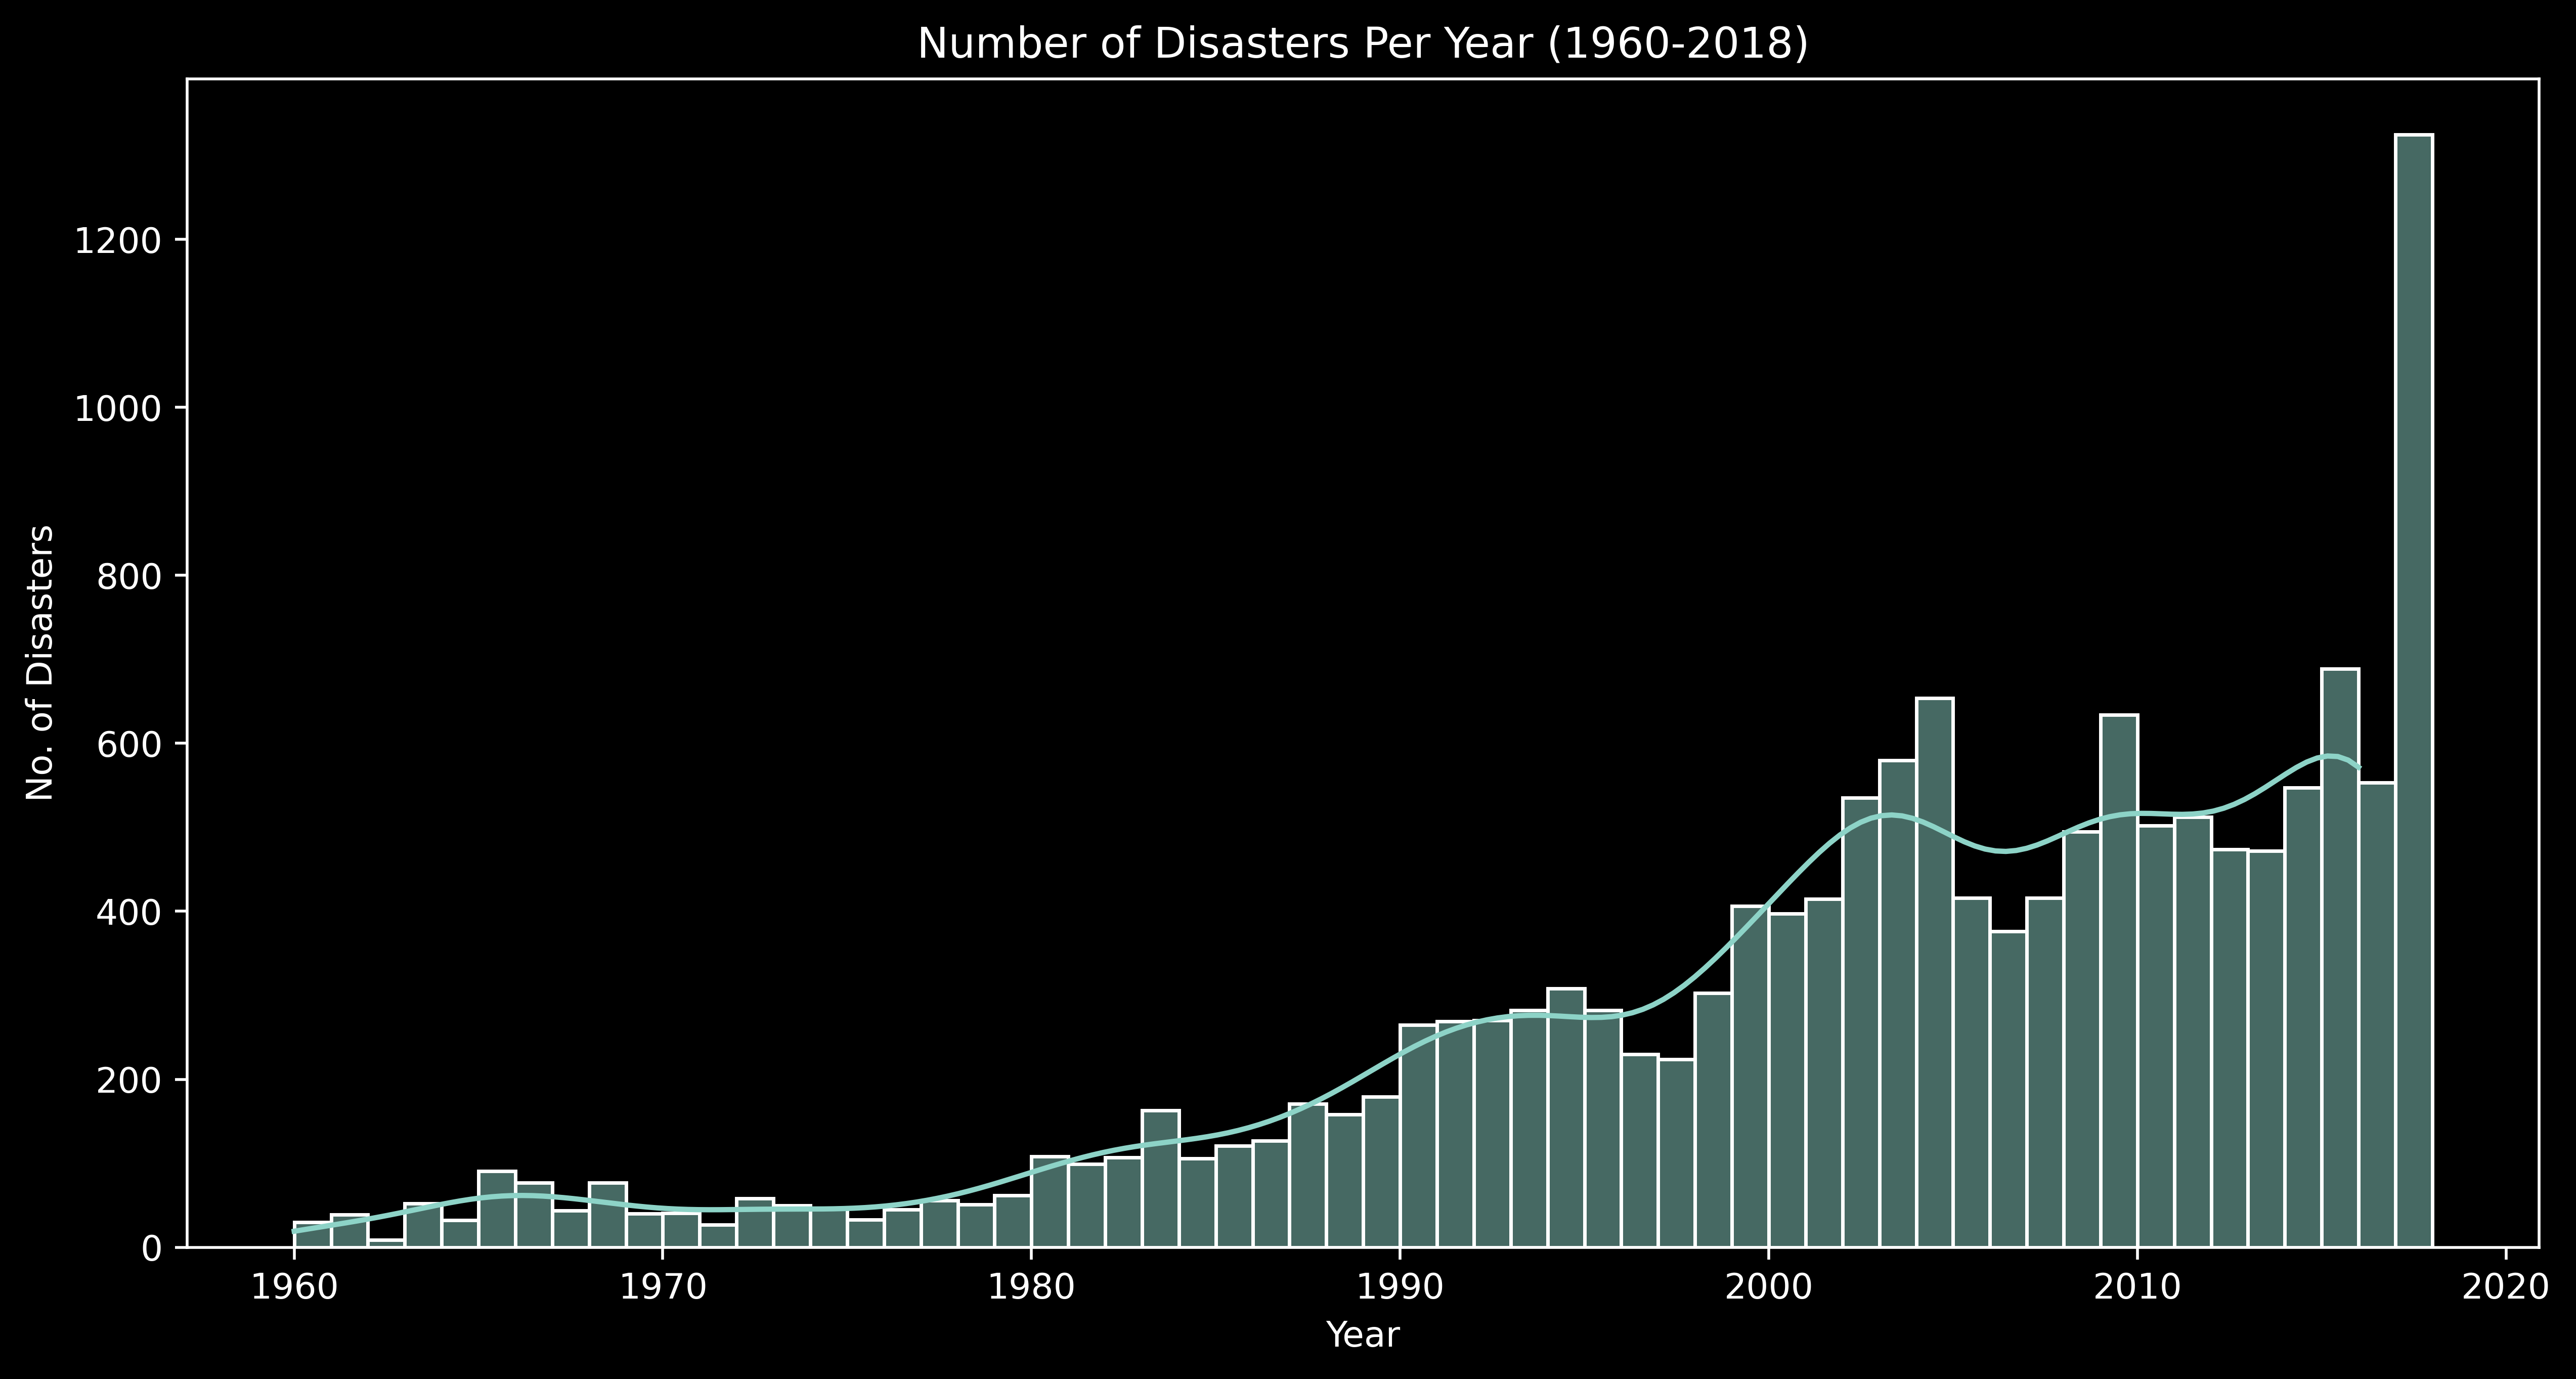

In [36]:
plt.style.use('dark_background')
plt.figure(figsize=(12, 6), dpi=500)
plt.grid(False)

sns.histplot(df_disaster['year'], bins=58, kde=True, kde_kws={'clip': (1960, 2016)}, palette="husl") # clip because KDE accounts for data outside the range
plt.title("Number of Disasters Per Year (1960-2018)")
plt.xlabel("Year")
plt.ylabel("No. of Disasters")
plt.show()

# Analysis

This time-series graph represents the number of disasters that had occurred from 1960 to 2018. From the graph, we can observe that the number of natural disasters per year has significantly increased across the years. This trend is likely caused by climate change and deforestation. As disasters become more frequent, they pose a threat to endangered species therefore, it is important that we enhance our strategies to protect these endangered species

# How is the Comparison of Conservation Status Across Different Animal Class?

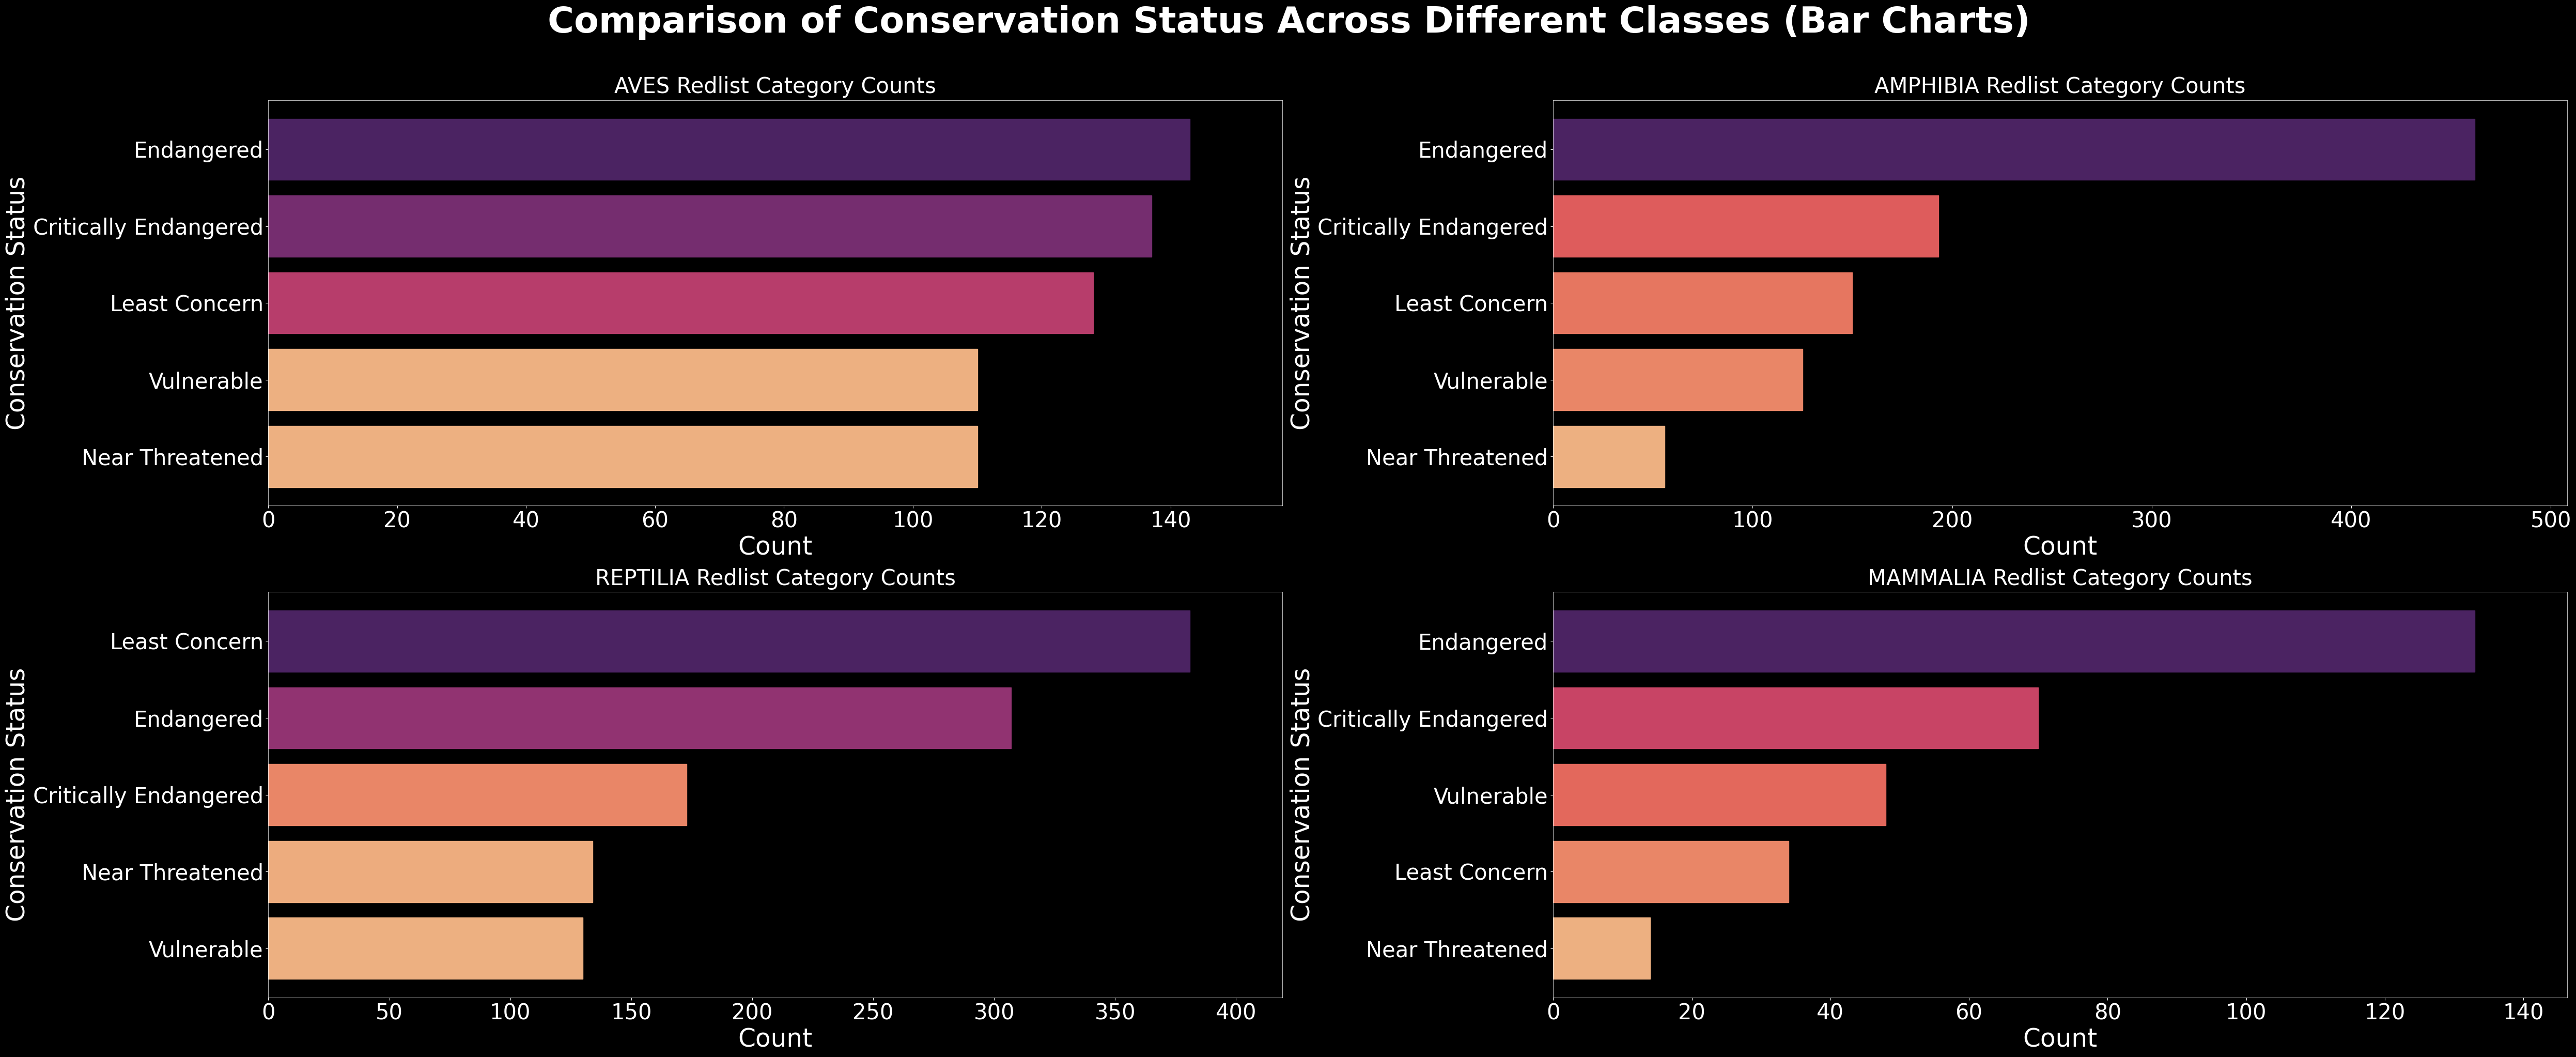

In [37]:
plt.style.use('dark_background')
class_names = ['AVES', 'AMPHIBIA', 'REPTILIA', 'MAMMALIA']
redlist_categories = ['Critically Endangered', 'Endangered', 'Vulnerable', 'Least Concern', 'Near Threatened']

def plot_bar_chart(ax, class_name, df):
    category_counts = df['redlistCategory'].value_counts().reindex(redlist_categories, fill_value=0).sort_values(ascending=False)
    values = category_counts.values
    
    labels = category_counts.index
    normalized = np.zeros_like(values, dtype=float) if values.max() == values.min() else (values - values.min()) / (values.max() - values.min())
    cmap = plt.get_cmap('flare')
    
    colors = [cmap(val) for val in normalized]
    y_positions = np.arange(len(values))
    bars = ax.barh(y_positions, values, edgecolor='none')

    for bar, color in zip(bars, colors):
        bar.set_color(color)

    ax.invert_yaxis()
    ax.set_yticks(y_positions)
    ax.set_yticklabels(labels)
    ax.grid(False)

    for spine in ax.spines.values():
        spine.set_linewidth(0.5)

    ax.set_title(f'{class_name} Redlist Category Counts', fontsize=30, pad=10)
    ax.set_xlabel('Count', fontsize=35)
    ax.set_ylabel('Conservation Status', fontsize=35)
    ax.set_xlim(0, values.max() * 1.1 if values.max() > 0 else 1)
    ax.tick_params(labelsize=30)
    


df = pd.concat([df_amphibia, df_aves, df_mammalia, df_reptilia], ignore_index=True)

fig_bar, axes_bar = plt.subplots(2, 2, figsize=(50, 20))
axes_bar = axes_bar.flatten()

for idx, class_name in enumerate(class_names):
    df_class = df[df['className'] == class_name]
    plot_bar_chart(axes_bar[idx], class_name, df_class)
        
fig_bar.suptitle('Comparison of Conservation Status Across Different Classes (Bar Charts)', fontsize=50, y=1.02,fontweight='bold')
fig_bar.tight_layout()
plt.show()


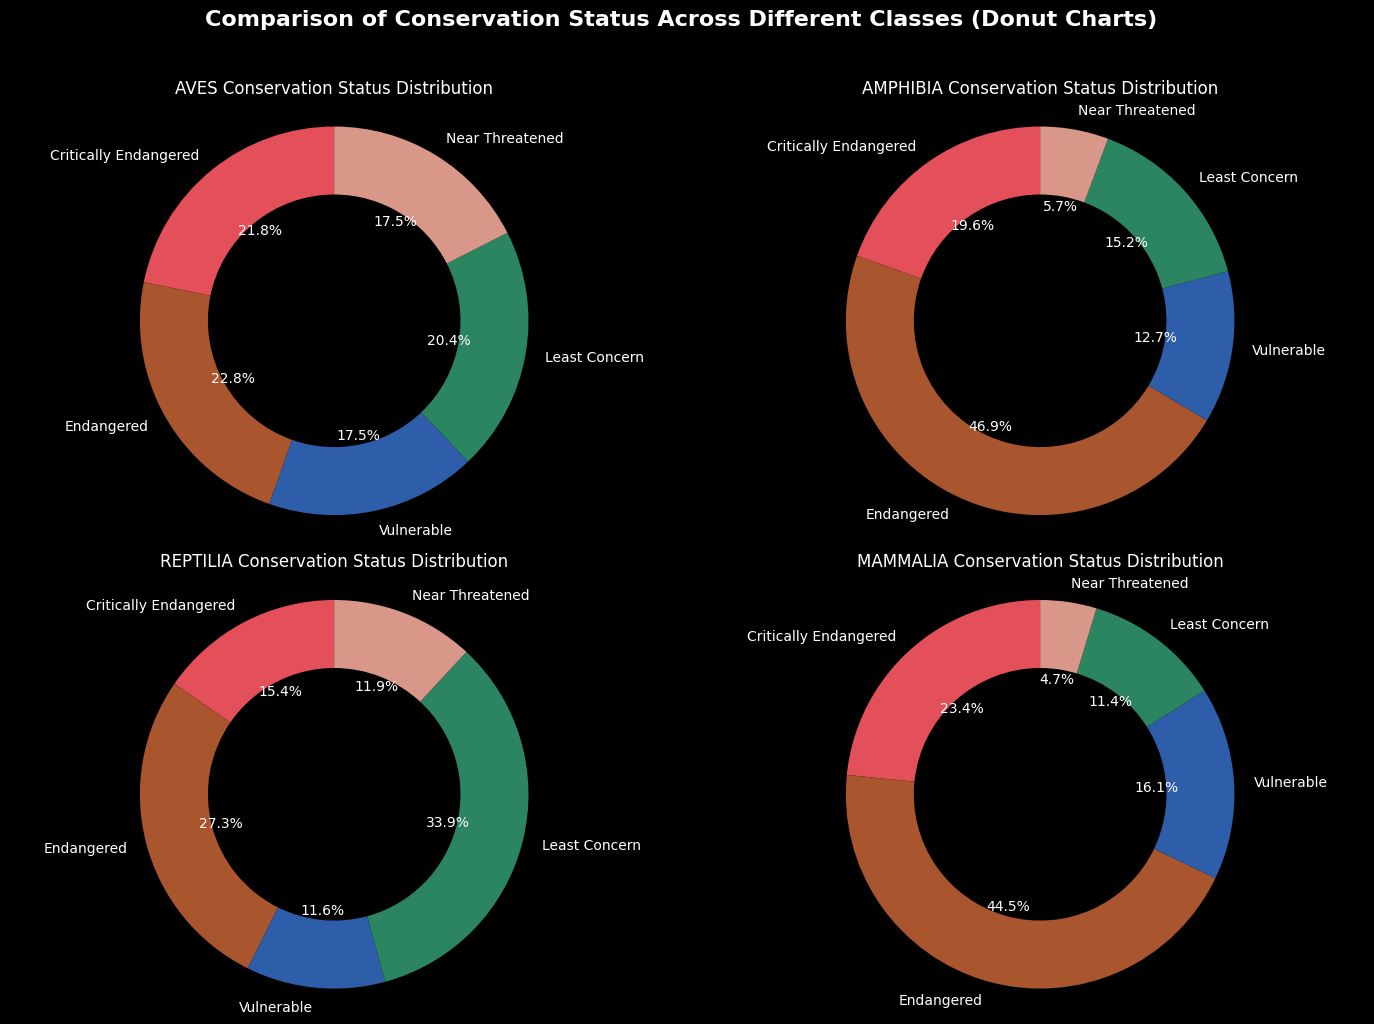

In [38]:
plt.style.use('dark_background')
class_names = ['AVES', 'AMPHIBIA', 'REPTILIA', 'MAMMALIA']
redlist_categories = ['Critically Endangered', 'Endangered', 'Vulnerable', 'Least Concern', 'Near Threatened']
palette = {'Endangered': "#a9552e", 'Vulnerable': "#2e5da9", 'Critically Endangered': "#e35059", 'Near Threatened': "#d89788", 'Least Concern': "#2b8560"}

def plot_donut_chart(ax, class_name, df):
    category_counts = df['redlistCategory'].value_counts()
    category_counts = category_counts.reindex(redlist_categories, fill_value=0)
    colors = [palette[cat] for cat in category_counts.index]
    wedges, texts, autotexts = ax.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops=dict(width=0.35, edgecolor='none'))
    ax.axis('equal')
    ax.set_title(f'{class_name} Conservation Status Distribution', fontsize=12, pad=10)
    for text in texts:
        text.set_fontsize(10)
    for autotext in autotexts:
        autotext.set_fontsize(10)

df = pd.concat([df_amphibia, df_aves, df_mammalia, df_reptilia], ignore_index=True)
fig_donut, axes_donut = plt.subplots(2, 2, figsize=(14, 10))
axes_donut = axes_donut.flatten()
for idx, class_name in enumerate(class_names):
    df_class = df[df['className'] == class_name]
    plot_donut_chart(axes_donut[idx], class_name, df_class)
fig_donut.suptitle('Comparison of Conservation Status Across Different Classes (Donut Charts)', fontsize=16, y=1.02, fontweight='bold')
fig_donut.tight_layout()
plt.show()


## Analysis

The bar charts show how many species fall into different conservation status which include endangered, critically endangered, least concern, vulnerable and near threatened across four different animal classes, aves/birds , amphibias, reptiles, and mammals. From the graph, we can see that amphibias have the highest counts of endangered and critically endangered species followed by reptiles. Aves also show significant number of threatened species even thought not as many as amphibia and reptiles. Overall, this suggests that amphibias face greatest conservation challenges as many of the species fall under threatened or critically threatened.

The bar chart gives the total number of edangered species but does not indicate the percentage of endangered species within a class. The donut chart provides a better visualisation for the distribution of the conservation status to see which classes are generally highly at risk and endangered. From the chart it can be seen taht amphibia and mammalia have the most number of endangered and critically endangered species which needs more attention to take care. 

# Which natural disasters impact each species of animals most?

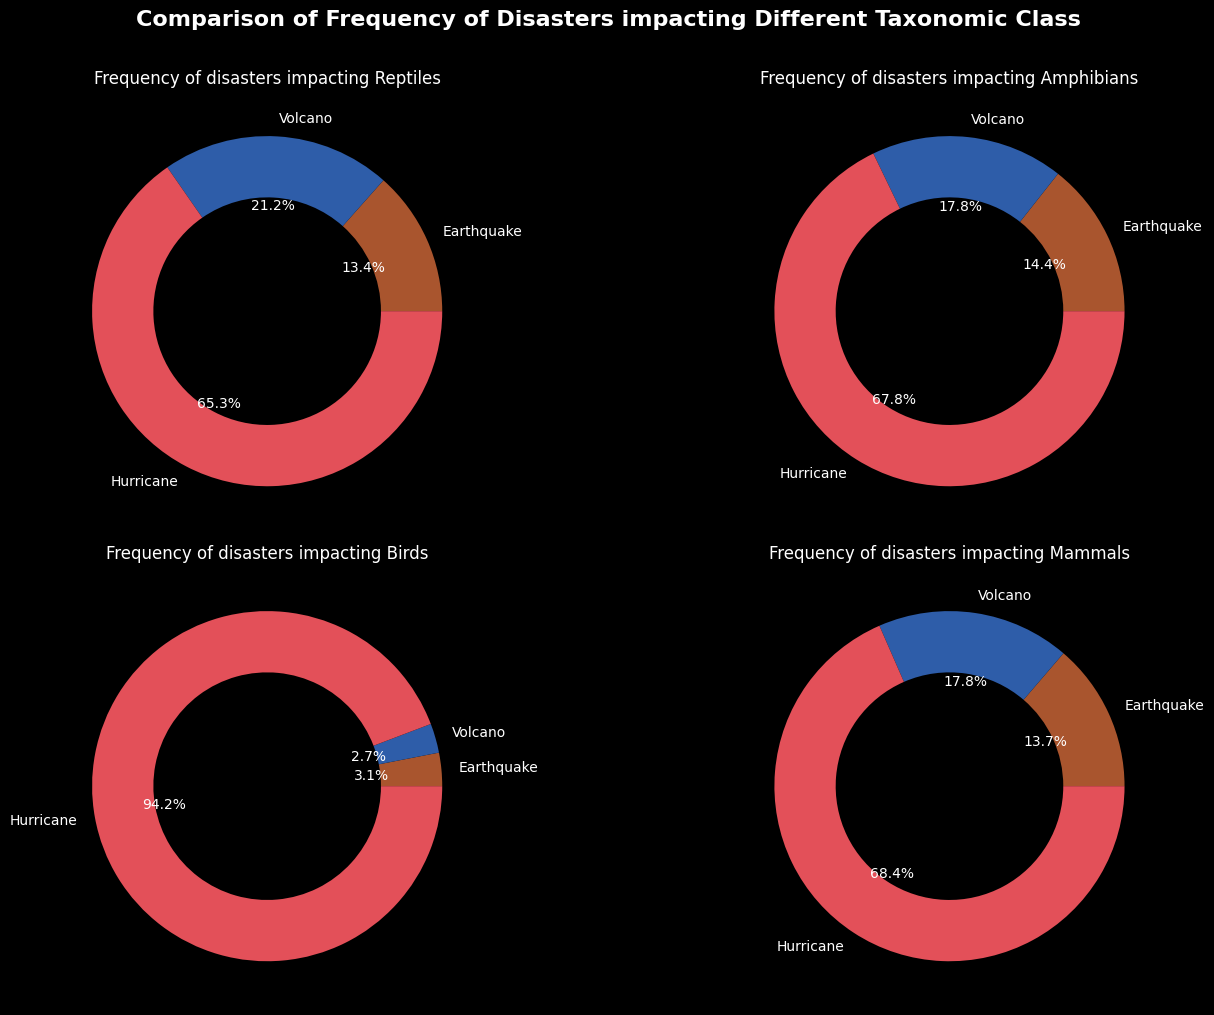

In [ ]:
def plot_donut_chart(ax, df, title):
    frequency_list = []
    disaster_types = ['Earthquake', 'Volcano', 'Hurricane']

    
    frequency_column = [9, 17,25]
    
    for column in frequency_column:
        frequency_list.append(df.iloc[:, column].mean())
    
    colors = ["#a9552e", "#2e5da9", "#e35059", "#d89788", "#2b8560"]

    wedges, autotexts, texts = ax.pie(frequency_list, labels=disaster_types,  wedgeprops=dict(width=0.35, edgecolor='none'), autopct='%1.1f%%', colors=colors)
    
    for text in texts:
        text.set_fontsize(10)
    for autotext in autotexts:
        autotext.set_fontsize(10)
    
    ax.set_title(title)

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

plot_donut_chart(axs[0, 0], df_reptilia, "Frequency of disasters impacting Reptiles")
plot_donut_chart(axs[0, 1], df_amphibia, "Frequency of disasters impacting Amphibians")
plot_donut_chart(axs[1, 0], df_aves, "Frequency of disasters impacting Birds")
plot_donut_chart(axs[1, 1], df_mammalia, "Frequency of disasters impacting Mammals")

fig.suptitle("Comparison of Frequency of Disasters impacting Different Animal Class", fontsize=16,y=1.01,fontweight='bold')

plt.tight_layout()

plt.show()


# Analysis

From the donut chart, we can see that hurricanes impact the most out of all the natural disasters with more than 60% of the disaster occurances across all species.
                                Birds are affected by volcanoes and earthquakes less frequently with 2.7% and 3.1% frequency respectively.
                                The remaining species tend to get affected more by volcanoes (Average of 14.9%) compared to earthquakes (Average of 11.2%)

# What is the relationship between natural disaster impact and conservation status in general?

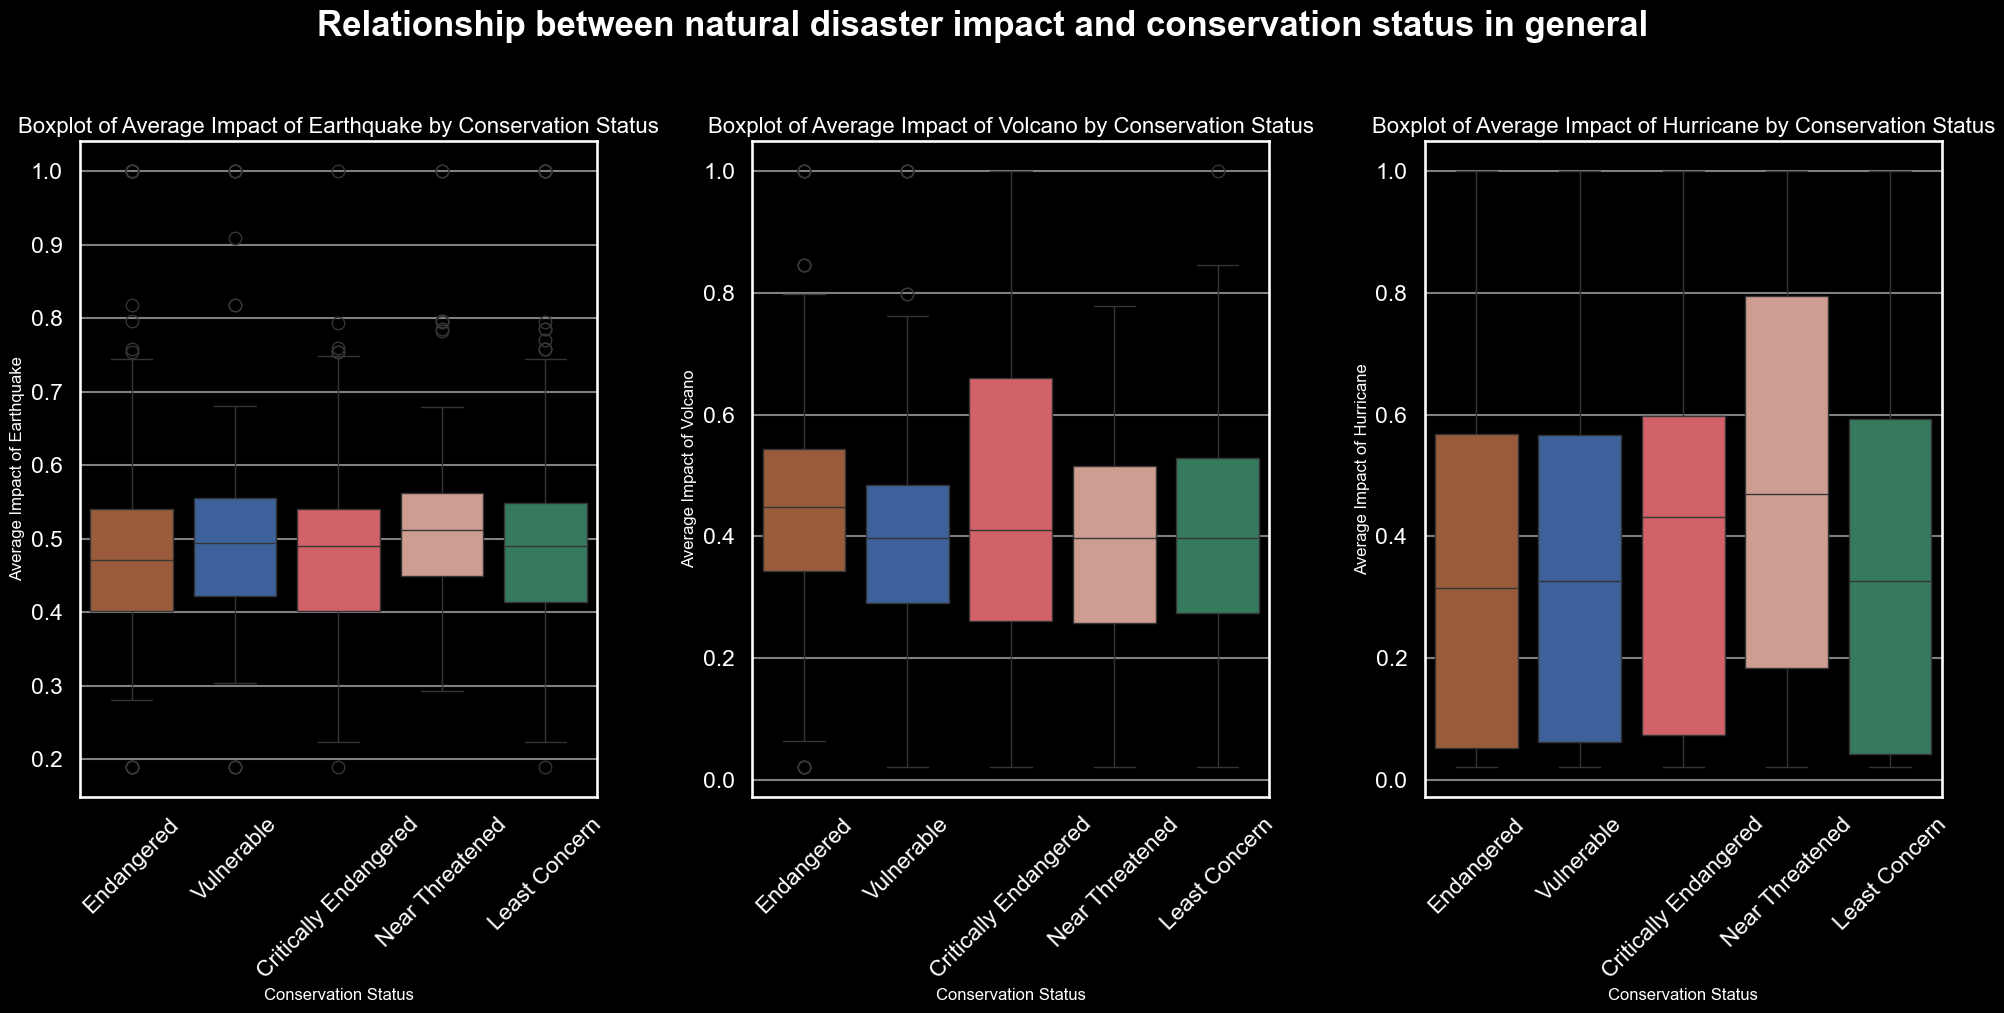

In [40]:
sns.set_theme(context="talk", rc={
    "figure.facecolor": "black",
    "axes.facecolor": "black",
    "grid.color": "gray",
    "xtick.color": "white",
    "ytick.color": "white",
    "text.color": "white",
    "axes.labelcolor": "white"
})

df = pd.concat([df_amphibia, df_aves, df_mammalia, df_reptilia], ignore_index=True)

impact_cols = [
    'avg_impact_sum_final_ear',
    'avg_impact_sum_final_vul',
    'avg_impact_sum_final_hur'
]

col_title_map = {
    'avg_impact_sum_final_ear': 'Average Impact of Earthquake',
    'avg_impact_sum_final_vul': 'Average Impact of Volcano',
    'avg_impact_sum_final_hur': 'Average Impact of Hurricane'
}

palette = {
    'Endangered': "#a9552e",
    'Vulnerable': "#2e5da9",
    'Critically Endangered': "#e35059",
    'Near Threatened': "#d89788",
    'Least Concern': "#2b8560"
}

fig, axes = plt.subplots(1,3, figsize=(20, 10))

for i, col in enumerate(impact_cols):
    ax = axes[i]
    sns.boxplot(
        data=df,
        x='redlistCategory',
        y=col,
        hue='redlistCategory',
        ax=ax,
        palette=palette,
        dodge=False
    )
    ax.set_title(f'Boxplot of {col_title_map[col]} by Conservation Status', fontsize=16, color='white')
    ax.set_xlabel('Conservation Status', fontsize=12, color='white')
    ax.set_ylabel(col_title_map[col], fontsize=12, color='white')
    ax.tick_params(axis='x', rotation=45, colors='white')
    ax.tick_params(axis='y', colors='white')

fig.suptitle('Relationship between natural disaster impact and conservation status in general', fontsize=25, color='white', y=1.02,fontweight='bold')
plt.tight_layout()
plt.subplots_adjust(wspace=0.3)
plt.show()


The average impacts score range from 0-1 where the higher means the disaster has higher impact. From the box plots, it can be seen that earthquake has the highest mean of the average impact compact and shortest range and intequartile range compared to other disaster. This means that the impact score of earthquake is more uniform and does not deviate much and has less variety. On the other hand, volcano has lower mean and wider range which means the data has more variety. Lastly, even though the mean of the impact of hurricane is slightly lower than volcano, hurricane has much higher frequency which relatively  make the mean of hurricane slightly lower compared to volcano.

# What are the risk levels different disasters have on different animal species?

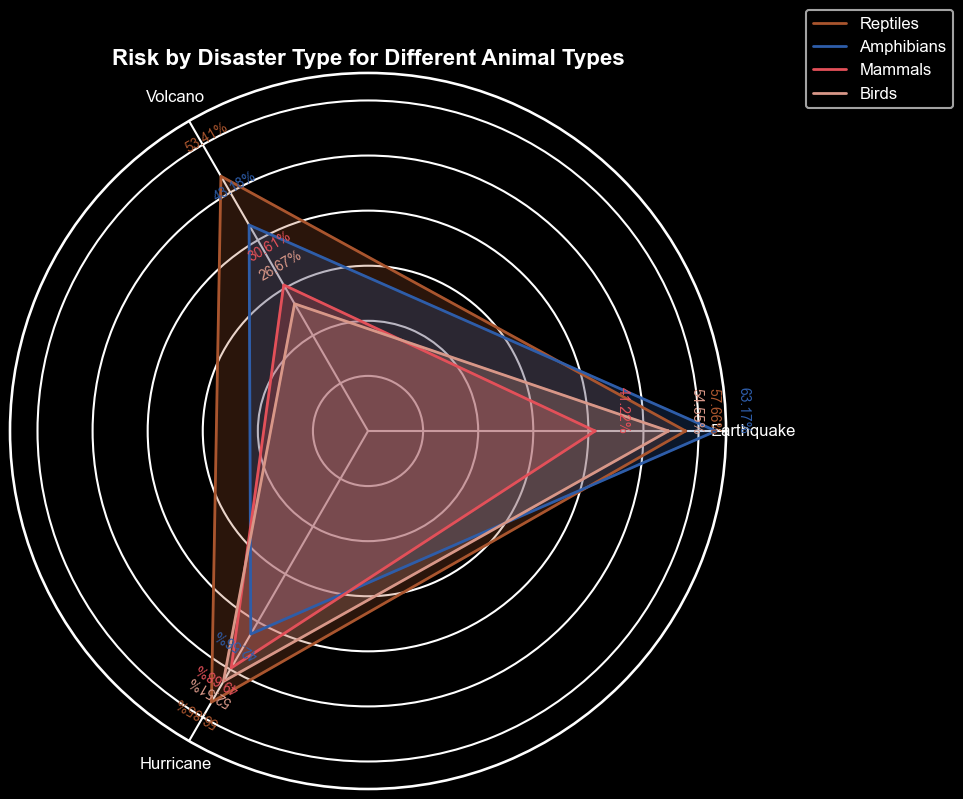

In [46]:
def calculate_risk(df):
    plt.style.use('dark_background')
    disaster_column = [10, 18,26]

    risk_list = []

    def risk_percentage(df):
        return df['high-risk'] / (df['high-risk'] + df['risk'])

    for column in disaster_column:
        disaster_df = df.iloc[:, column].value_counts().to_frame().T
        risk = risk_percentage(disaster_df)
        
        risk_list.append(risk)

    return risk_list
    
reptiles_risk = calculate_risk(df_reptilia)
amphibian_risk = calculate_risk(df_amphibia)
bird_risk = calculate_risk(df_aves)
mammal_risk = calculate_risk(df_mammalia)

animal_types = ['Reptiles', 'Amphibians', 'Mammals', 'Birds']
all_risk = [reptiles_risk, amphibian_risk, bird_risk, mammal_risk]
disaster_types = ['Earthquake', 'Volcano', 'Hurricane']

num_vars = len(disaster_types)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

all_risk = [risk + [risk[0]] for risk in all_risk]

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

colors = ["#a9552e", "#2e5da9", "#e35059", "#d89788", "#2b8560"]

for i, risk in enumerate(all_risk):
    ax.plot(angles, risk, linewidth=2, label=animal_types[i], color=colors[i])
    ax.fill(angles, risk, alpha=0.25, color=colors[i])

    for j, (angle, value) in enumerate(zip(angles[:-1], risk[:-1])):  
        offset = 0.05 + (i * 0.07)
        rotation = np.degrees(angle)
        ax.text(angle, value.iloc[0] + 0.05, f"{value.iloc[0]*100:.2f}%", ha='center', fontsize=10, color=colors[i], rotation= rotation - 90)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(disaster_types, fontsize=12)

ax.set_yticklabels([])

ax.legend(loc='upper left', bbox_to_anchor=(1.1, 1.1), fontsize=12, title_fontsize=14)

plt.title('Risk by Disaster Type for Different Animal Types', size=16,fontweight='bold')
plt.tight_layout()

plt.show()

## Analysis

The radar chart shows the percentage of high-risk that the disasters pose to each species. We can observe that reptiles, amphibians and birds are the most affected by earthquakes while mammals are the most affected by hurricanes.
Reptiles are the most prone while mammals are the least affected across all 3 disaster types at 55.87% and 40.50% respectively.
Looking at the average of high-risk caused by each natural disaster, we can observe that Earthquakes pose the most risk at an average of 54.15%, followed by Hurricanes at 50.40% and finally Volcanoes at 38.39%.

# What is the comparison of each animal class in different realm?

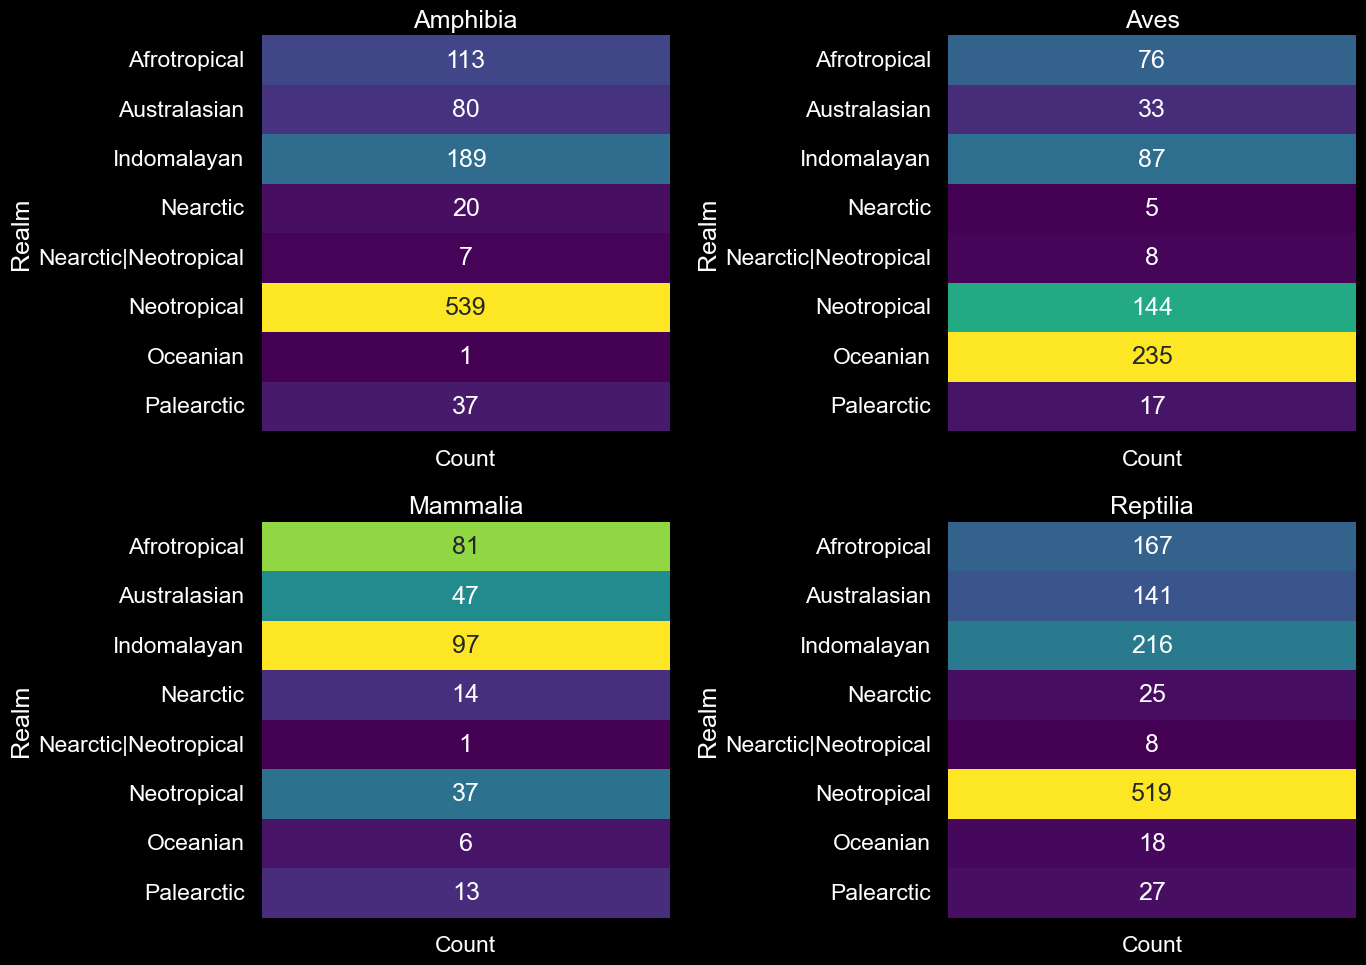

In [42]:
plt.style.use('dark_background')

for df in [df_amphibia, df_aves, df_mammalia, df_reptilia]:
    df.columns = df.columns.str.strip()

common_realms = set(df_amphibia['realm'].unique())
common_realms &= set(df_aves['realm'].unique())
common_realms &= set(df_mammalia['realm'].unique())
common_realms &= set(df_reptilia['realm'].unique())

classes = [
    ('Amphibia', df_amphibia),
    ('Aves', df_aves),
    ('Mammalia', df_mammalia),
    ('Reptilia', df_reptilia)
]

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

for ax, (cls, df_cls) in zip(axs.flat, classes):
    counts = df_cls['realm'].value_counts()
    counts = counts[counts.index.isin(common_realms)].sort_index()
    sns.heatmap(counts.to_frame(name='Count'), annot=True, fmt='d', cmap='viridis', ax=ax, cbar=False)
    ax.set_title(cls)
    ax.set_ylabel("Realm")

plt.tight_layout()
plt.show()

# Analysis

Neotropical has an abundance of amphibians (539) and reptiles (519). Although birds are relatively high in the realm, they have a higher count in the Oceanian realm.
Mammals on the other hand, are more commonly found in the Indomalayan and Afrotropical realms.
Reptiles are more widely distributed compared to amphibians as shown from their count in other realms such as Indomalayan, Afrotrophical and Australasian.

# What are the most affected countries by each type of natural disasters?

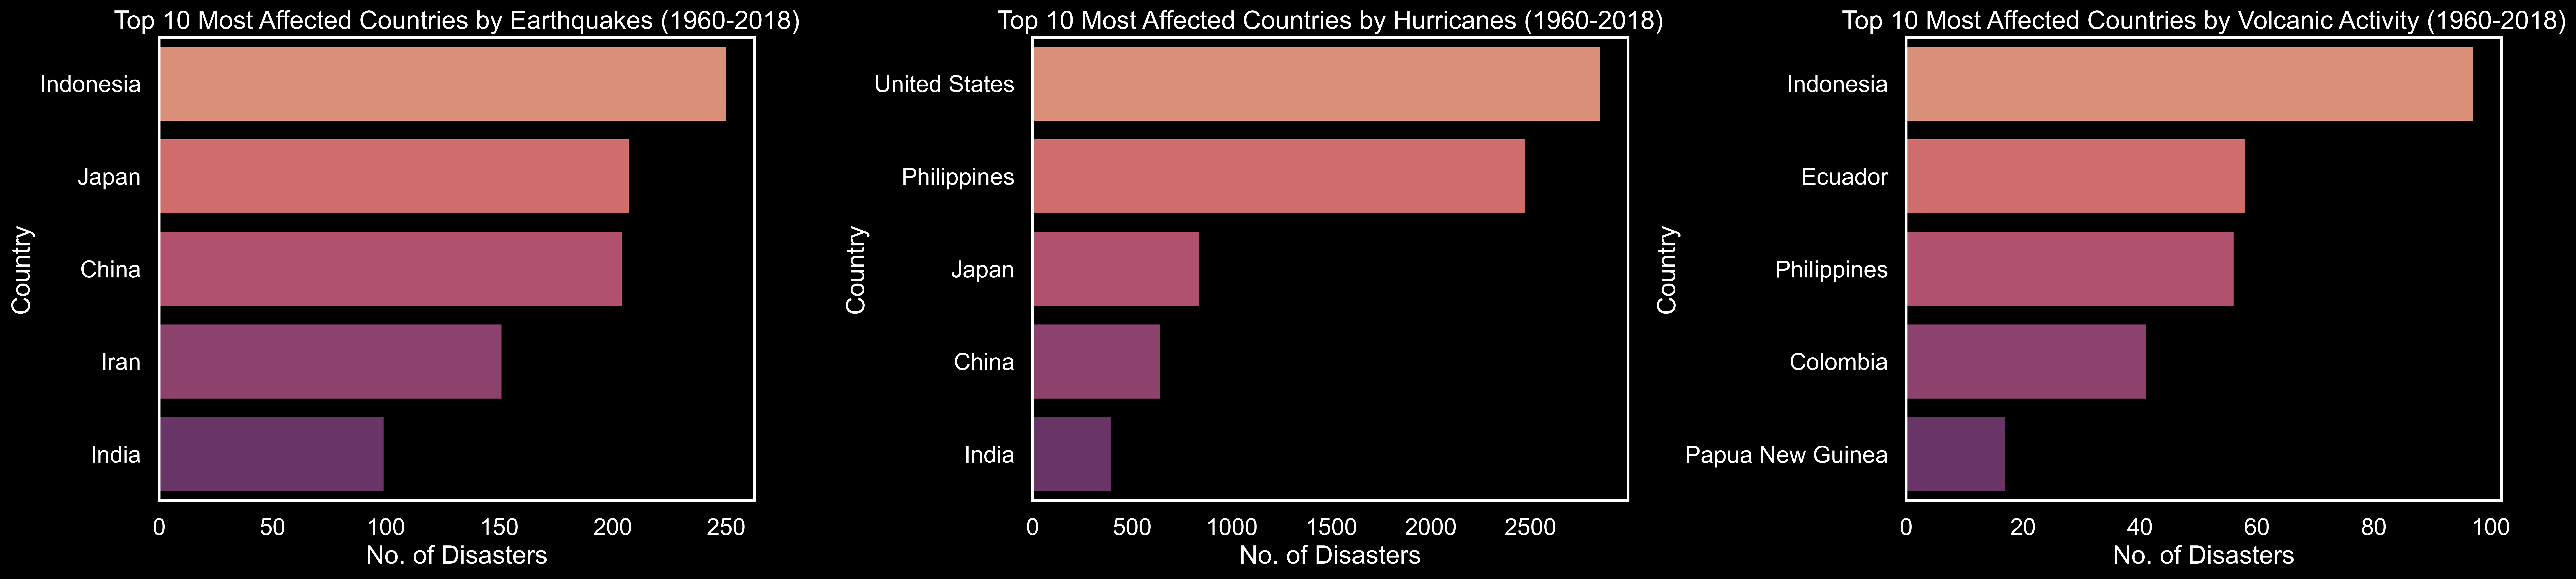

In [43]:
plt.style.use('dark_background')
fig, axs = plt.subplots(1, 3, figsize=(25, 6), dpi=500)

top_countries_earthquake = df_disaster[df_disaster['disastertype'] == 'earthquake']['country'].value_counts().nlargest(5)
top_countries_storm = df_disaster[df_disaster['disastertype'] == 'storm']['country'].value_counts().nlargest(5)
top_countries_volcanic = df_disaster[df_disaster['disastertype'] == 'volcanic activity']['country'].value_counts().nlargest(5)

sns.barplot(x=top_countries_earthquake.values, y=top_countries_earthquake.index, palette="flare", ax=axs[0], hue=top_countries_earthquake.index)
axs[0].set_title("Top 10 Most Affected Countries by Earthquakes (1960-2018)")
axs[0].set_xlabel("No. of Disasters")
axs[0].set_ylabel("Country")
axs[0].grid(False)
for bar in axs[0].patches:
    bar.set_edgecolor(bar.get_facecolor())
    bar.set_linewidth(0)

sns.barplot(x=top_countries_storm.values, y=top_countries_storm.index, palette="flare", ax=axs[1],hue=top_countries_storm.index)
axs[1].set_title("Top 10 Most Affected Countries by Hurricanes (1960-2018)")
axs[1].set_xlabel("No. of Disasters")
axs[1].set_ylabel("Country")
axs[1].grid(False)
for bar in axs[1].patches:
    bar.set_edgecolor(bar.get_facecolor())
    bar.set_linewidth(0)

sns.barplot(x=top_countries_volcanic.values, y=top_countries_volcanic.index, palette="flare", ax=axs[2],hue=top_countries_volcanic.index)
axs[2].set_title("Top 10 Most Affected Countries by Volcanic Activity (1960-2018)")
axs[2].set_xlabel("No. of Disasters")
axs[2].set_ylabel("Country")
axs[2].grid(False)
for bar in axs[2].patches:
    bar.set_edgecolor(bar.get_facecolor())
    bar.set_linewidth(0)

plt.tight_layout()
plt.show()


# Analysis

From the bar chart, we can see that countries affected by earthquakes are Indonesia, Japan, China , India which are located in Indomalayan realm. This means that earthquakes mostly occur in this indomalayan realm. On the other hand, US which is located in nearctic realm is the most affected by hurricanes followed by philippines, japan, china, and india that are located in indomalayan realm. Lastly, Indonesia that is located in indomalayan realm is the most affected by volcano followed ecuador located in neotropical realm.

# Conclusion

From our analysis, we can conclude that the Indomalayan realm requires the most attention as it has a high concentration of all the species which are endangered and is highly vulnerable to all 3 natural disasters types (Earthquakes, Hurricanes and Volcanoes).

More conservation efforts need to be focused on mammals and amphibians as shown Figure 3 as they have the highest percentage of endangered and critically endangered.

Referring to Figure 6, conservation efforts for amphibians should be focused towards volcanoes and earthquakes, for mammals and birds, it should be focused more towards earthquakes and hurricanes and for reptiles, it should be evenly focused on.

Meanwhile, in the Neotropical realm, conservation efforts should be focused on reducing the impact of volcanoes, particularly for reptiles and amphibians.